<a href="https://colab.research.google.com/github/patelruday/Sentiments_analysys_using_BERT_transformer/blob/main/sentiment_bert_huggingface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"OM NAMO BHAGVATE VASUDEVAY"

In [ ]:
import os
import shutil
import tarfile
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
import pandas as pd
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


Load dataset

In [ ]:
current_dir = os.getcwd()
dataset=tf.keras.utils.get_file(
    fname="aclImdb_v1.tar.gz",
    origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz" ,
    extract=True,
    cache_dir=current_dir,


)

84125825/84125825 [==============================] - 8s 0us/step


Check dataset folder


In [ ]:
dataset_path=os.path.dirname(dataset)
print(os.listdir(dataset_path))

['aclImdb_v1.tar.gz', 'aclImdb']


check the aclImdb

In [ ]:
dataset_dir=os.path.join(dataset_path,'aclImdb')
print(os.listdir(dataset_dir))

['README', 'train', 'imdb.vocab', 'imdbEr.txt', 'test']


chek train folder

In [ ]:
train_dir=os.path.join(dataset_dir,'train')
print(os.listdir(train_dir))

['neg', 'unsupBow.feat', 'urls_neg.txt', 'unsup', 'labeledBow.feat', 'urls_pos.txt', 'pos', 'urls_unsup.txt']


read the files of train_dir

In [ ]:
for file in os.listdir(train_dir):
	file_path = os.path.join(train_dir, file)
	# Check if it's a file (not a directory)
	if os.path.isfile(file_path):
		with open(file_path, 'r', encoding='utf-8') as f:
			first_value = f.readline().strip()
			print(f"{file}: {first_value}")
	else:
		print(f"{file}: {file_path}")


neg: /content/datasets/aclImdb/train/neg
unsupBow.feat: 0 0:8 1:6 3:5 4:2 5:1 7:1 8:5 9:2 10:1 11:2 13:3 16:1 17:1 18:1 19:1 22:3 24:1 26:3 28:1 30:1 31:1 35:2 36:1 39:2 40:1 41:2 46:2 47:1 48:1 52:1 63:1 67:1 68:1 74:1 81:1 83:1 87:1 104:1 105:1 112:1 117:1 131:1 151:1 155:1 170:1 198:1 225:1 226:1 288:2 291:1 320:1 331:1 342:1 364:1 374:1 384:2 385:1 407:1 437:1 441:1 465:1 468:1 470:1 519:1 595:1 615:1 650:1 692:1 851:1 937:1 940:1 1100:1 1264:1 1297:1 1317:1 1514:1 1728:1 1793:1 1948:1 2088:1 2257:1 2358:1 2584:2 2645:1 2735:1 3050:1 4297:1 5385:1 5858:1 7382:1 7767:1 7773:1 9306:1 10413:1 11881:1 15907:1 18613:1 18877:1 25479:1
urls_neg.txt: http://www.imdb.com/title/tt0064354/usercomments
unsup: /content/datasets/aclImdb/train/unsup
labeledBow.feat: 9 0:9 1:1 2:4 3:4 4:6 5:4 6:2 7:2 8:4 10:4 12:2 26:1 27:1 28:1 29:2 32:1 41:1 45:1 47:1 50:1 54:2 57:1 59:1 63:2 64:1 66:1 68:2 70:1 72:1 78:1 100:1 106:1 116:1 122:1 125:1 136:1 140:1 142:1 150:1 167:1 183:1 201:1 207:1 208:1 213:1 2

Load the Movies reviews and convert them into the pandas’ data frame with their respective sentiment
Here 0 means negative and 1 means positive

In [ ]:
def load_dataset(directory):
	data = {"sentence": [], "sentiment": []}
	for file_name in os.listdir(directory):
		print(file_name)
		if file_name == 'pos':
			positive_dir = os.path.join(directory, file_name)
			for text_file in os.listdir(positive_dir):
				text = os.path.join(positive_dir, text_file)
				with open(text, "r", encoding="utf-8") as f:
					data["sentence"].append(f.read())
					data["sentiment"].append(1)
		elif file_name == 'neg':
			negative_dir = os.path.join(directory, file_name)
			for text_file in os.listdir(negative_dir):
				text = os.path.join(negative_dir, text_file)
				with open(text, "r", encoding="utf-8") as f:
					data["sentence"].append(f.read())
					data["sentiment"].append(0)

	return pd.DataFrame.from_dict(data)


load train dataset

In [ ]:
# Load the dataset from the train_dir
train_df = load_dataset(train_dir)
print(train_df.head())


neg
unsupBow.feat
urls_neg.txt
unsup
labeledBow.feat
urls_pos.txt
pos
urls_unsup.txt
                                            sentence  sentiment
0  Where to begin, there's so much wrong and horr...          0
1  This film is not even worth walking to the mov...          0
2  Blood Surf AKA Krocodylus is a fair film that ...          0
3  The real irony is this: Joe Besser was a top n...          0
4  The final film for Ernst Lubitsch, completed b...          0


Load the test dataset respectively

In [ ]:
test_dir = os.path.join(dataset_dir,'test')

# Load the dataset from the train_dir
test_df = load_dataset(test_dir)
print(test_df.head())


neg
urls_neg.txt
labeledBow.feat
urls_pos.txt
pos
                                            sentence  sentiment
0  This sequel is quite awful to be honest. I'm a...          0
1  I wasn`t expecting much with HARLEM NIGHTS but...          0
2  I'm sorry, but I cannot understand what people...          0
3  I have to admit, I'm not a big fan of Satanic ...          0
4  Not much to say other than plenty of Wire-fu a...          0


Preprocessing

In [ ]:
sentiment_counts = train_df['sentiment'].value_counts()

fig =px.bar(x= {0:'Negative',1:'Positive'},
			y= sentiment_counts.values,
			color=sentiment_counts.index,
			color_discrete_sequence = px.colors.qualitative.Dark24,
			title='<b>Sentiments Counts')

fig.update_layout(title='Sentiments Counts',
				xaxis_title='Sentiment',
				yaxis_title='Counts',
				template='plotly_dark')

# Show the bar chart
fig.show()
pyo.plot(fig, filename = 'Sentiments Counts.html', auto_open = True)


'Sentiments Counts.html'

Text cleaning

In [ ]:
def text_cleaning(text):
	soup = BeautifulSoup(text, "html.parser")
	text = re.sub(r'\[[^]]*\]', '', soup.get_text())
	pattern = r"[^a-zA-Z0-9\s,']"
	text = re.sub(pattern, '', text)
	return text


Apply text_cleaning

In [ ]:
# Train dataset
train_df['Cleaned_sentence'] = train_df['sentence'].apply(text_cleaning).tolist()
# Test dataset
test_df['Cleaned_sentence'] = test_df['sentence'].apply(text_cleaning)


<ipython-input-11-2374454d2258>:2: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.

<ipython-input-11-2374454d2258>:2: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.



Plot reviews on WordCLouds

In [ ]:
# Function to generate word cloud
def generate_wordcloud(text,Title):
	all_text = " ".join(text)
	wordcloud = WordCloud(width=800,
						height=400,
						stopwords=set(STOPWORDS),
						background_color='black').generate(all_text)
	plt.figure(figsize=(10, 5))
	plt.imshow(wordcloud, interpolation='bilinear')
	plt.axis("off")
	plt.title(Title)
	plt.show()


Positive Reviews

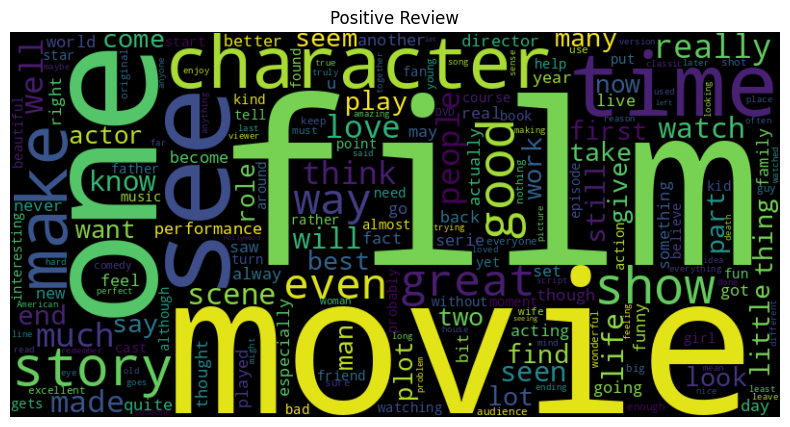

In [ ]:
positive = train_df[train_df['sentiment']==1]['Cleaned_sentence'].tolist()
generate_wordcloud(positive,'Positive Review')


Negative Reviews

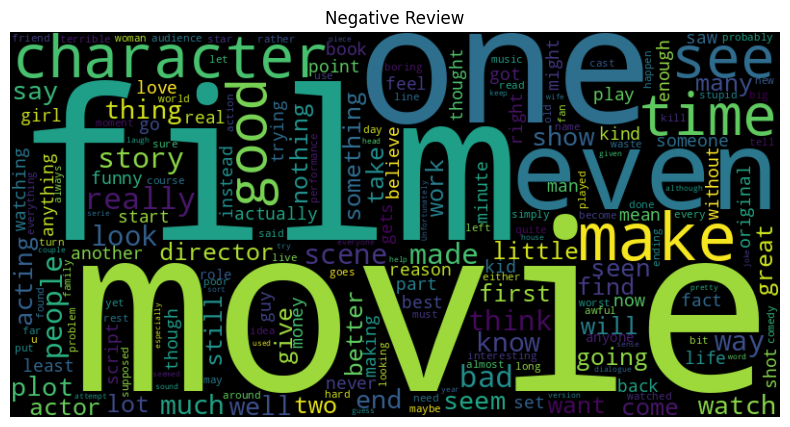

In [ ]:
negative = train_df[train_df['sentiment']==0]['Cleaned_sentence'].tolist()
generate_wordcloud(negative,'Negative Review')


Separate input text and target sentiment of both train and test

In [ ]:
# Training data
#Reviews = "[CLS] " +train_df['Cleaned_sentence'] + "[SEP]"
Reviews = train_df['Cleaned_sentence']
Target = train_df['sentiment']

# Test data
#test_reviews = "[CLS] " +test_df['Cleaned_sentence'] + "[SEP]"
test_reviews = test_df['Cleaned_sentence']
test_targets = test_df['sentiment']


Split TEST data into test and validation

In [ ]:
x_val, x_test, y_val, y_test = train_test_split(test_reviews,
													test_targets,
													test_size=0.5,
													stratify = test_targets)


Tokenization & Encoding
Load the pre-trained BERT tokenizer


In [ ]:
#Tokenize and encode the data using the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Apply the BERT tokenization in training, testing and validation dataset

In [ ]:
max_len= 128
# Tokenize and encode the sentences
X_train_encoded = tokenizer.batch_encode_plus(Reviews.tolist(),
											padding=True,
											truncation=True,
											max_length = max_len,
											return_tensors='tf')

X_val_encoded = tokenizer.batch_encode_plus(x_val.tolist(),
											padding=True,
											truncation=True,
											max_length = max_len,
											return_tensors='tf')

X_test_encoded = tokenizer.batch_encode_plus(x_test.tolist(),
											padding=True,
											truncation=True,
											max_length = max_len,
											return_tensors='tf')


Check the encoded dataset

In [ ]:
k = 0
print('Training Comments -->>',Reviews[k])
print('\nInput Ids -->>\n',X_train_encoded['input_ids'][k])
print('\nDecoded Ids -->>\n',tokenizer.decode(X_train_encoded['input_ids'][k]))
print('\nAttention Mask -->>\n',X_train_encoded['attention_mask'][k])
print('\nLabels -->>',Target[k])


Training Comments -->> Where to begin, there's so much wrong and horrible about this movie I am not sure where to start Okay, the two stooges who wrote this crapper Joseph Green and Rex Carlton, first they couldn't make up their socalled minds for a name My guess they split the difference, that's why the main title is BRAIN THAT WOULDN'T DIE, but the end screen says HEAD THAT WOULDN'T DIE Neither one knows anything about the Medical profession After all Doctors take oaths to do no harm Killing a woman for a head transplant would be considered harm Plus, a little thing called blood and tissue matching Rejection would spell death for Jan in the pan Plus who keeps a patch work monster What medical school did Bill graduate from, FRANKENSTIEN UNIVERSITY Old FU, or MAD SCIENTIST TECH The monster had no name, that bugs the hell out of me Plus, the brilliant surgeon Doctor Bill Cortner doesn't know how to keep a patient sedated All and all a disaster of a movie, it's incredibly stupid and unwa

Build the classification model

In [ ]:
# Intialize the model
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.summary()



Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0 (unused)
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109483778 (417.65 MB)
Trainable params: 109483778 (417.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile the model

In [ ]:
# Compile the model with an appropriate optimizer, loss function, and metrics
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])


Train the model

In [ ]:
# Step 5: Train the model
history = model.fit(
	[X_train_encoded['input_ids'], X_train_encoded['token_type_ids'], X_train_encoded['attention_mask']],
	Target,
	validation_data=(
	[X_val_encoded['input_ids'], X_val_encoded['token_type_ids'], X_val_encoded['attention_mask']],y_val),
	batch_size=32,
	epochs=3
)


Epoch 1/3
782/782 [==============================] - 796s 961ms/step - loss: 0.3531 - accuracy: 0.8372 - val_loss: 0.2623 - val_accuracy: 0.8866
Epoch 2/3
782/782 [==============================] - 753s 963ms/step - loss: 0.2028 - accuracy: 0.9189 - val_loss: 0.2857 - val_accuracy: 0.8857
Epoch 3/3
782/782 [==============================] - 787s 1s/step - loss: 0.1093 - accuracy: 0.9608 - val_loss: 0.3427 - val_accuracy: 0.8859


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
y_pred=model.predict([X_test_encoded['input_ids'], X_test_encoded['token_type_ids'], X_test_encoded['attention_mask']])

391/391 [==============================] - 111s 274ms/step


In [ ]:
import numpy as np
y_pred_1=np.argmax(y_pred[0],axis=1)

In [ ]:
print(classification_report(y_test,y_pred_1))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      6250
           1       0.88      0.90      0.89      6250

    accuracy                           0.89     12500
   macro avg       0.89      0.89      0.89     12500
weighted avg       0.89      0.89      0.89     12500



In [ ]:
print(confusion_matrix(y_test,y_pred_1))

[[5460  790]
 [ 635 5615]]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

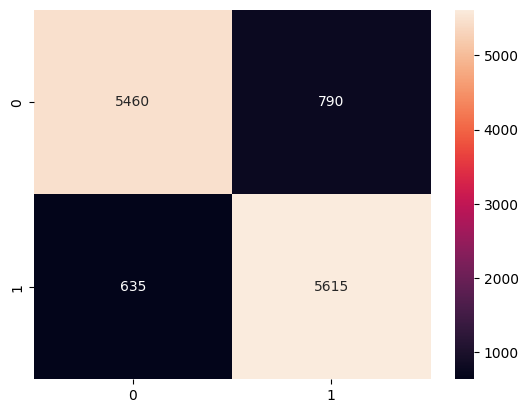

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred_1),annot=True,fmt='d')